<h1><strong>🧠 Exploratory Data Analysis: Personality Dataset</strong></h1>

This notebook performs EDA on personality datasets. We load, merge, clean, and visualize the data. It includes:

<ul>
  <li>📦 Library imports</li>
  <li>📊 Data inspection</li>
  <li>🧹 Cleaning</li>
  <li>📈 Visual analysis</li>
</ul>

<h2>📦 Importing Required Libraries</h2>

In [3]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>📂 Loading and Inspecting Data</h2>

In [11]:
#changing directory
os.chdir('C:/Users/ROSHAN/Desktop/swayam+/Py_Workspace')

#loading datasets into a dataframe 
df1=pd.read_csv("personality_datasert.csv")
df2=pd.read_csv("personality_dataset.csv")

In [73]:
#Checking wheether both datasets are same.
print("Is both the datasets same?", df1.equals(df2))

Is both the datasets same? False


In [13]:
#combine both datasets and drop duplicate rows
data=pd.concat([df1, df2], axis=0, join='outer', ignore_index=True)
data=data.drop_duplicates()

<h2>🧹Cleaning the Data</h2>

In [14]:
print(data.columns)

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')


In [24]:
#to undestand the column name,type and count
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2912 entries, 0 to 5798
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2912 non-null   float64
 1   Stage_fear                 2839 non-null   object 
 2   Social_event_attendance    2851 non-null   float64
 3   Going_outside              2847 non-null   float64
 4   Drained_after_socializing  2861 non-null   object 
 5   Friends_circle_size        2837 non-null   float64
 6   Post_frequency             2849 non-null   float64
 7   Personality                2912 non-null   object 
dtypes: float64(5), object(3)
memory usage: 204.8+ KB
None


In [25]:
#to know the no of null present in each column
print(data.isna().sum())

Time_spent_Alone              0
Stage_fear                   73
Social_event_attendance      61
Going_outside                65
Drained_after_socializing    51
Friends_circle_size          75
Post_frequency               63
Personality                   0
dtype: int64


<h3>Filling the missing values of each column</h3>

In [17]:
print(data['Time_spent_Alone'].describe())

count    2851.000000
mean        4.246178
std         3.405147
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        11.000000
Name: Time_spent_Alone, dtype: float64


In [22]:
data['Time_spent_Alone'] = data['Time_spent_Alone'].fillna(data['Time_spent_Alone'].mean())

In [23]:
#checking if it works
print(data['Time_spent_Alone'].isna().sum())

0


In [26]:
print(data['Stage_fear'].value_counts())

Stage_fear
No     1582
Yes    1257
Name: count, dtype: int64


In [28]:
data['Stage_fear']=data['Stage_fear'].fillna(data['Stage_fear'].value_counts().index[0])

In [29]:
print(data['Social_event_attendance'].describe())

count    2851.000000
mean        4.196340
std         2.883235
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        10.000000
Name: Social_event_attendance, dtype: float64


In [31]:
data['Social_event_attendance']=data['Social_event_attendance'].fillna(data['Social_event_attendance'].mean())

In [32]:
print(data['Going_outside'].describe())

count    2847.000000
mean        3.162627
std         2.214095
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         7.000000
Name: Going_outside, dtype: float64


In [33]:
data['Going_outside']=data['Going_outside'].fillna(data['Going_outside'].median())

In [34]:
print(data['Drained_after_socializing'].value_counts())

Drained_after_socializing
No     1608
Yes    1253
Name: count, dtype: int64


In [36]:
data['Drained_after_socializing']=data['Drained_after_socializing'].fillna(data['Drained_after_socializing'].value_counts().index[0])

In [37]:
print(data['Friends_circle_size'].describe())

count    2837.000000
mean        6.575666
std         4.243067
min         0.000000
25%         3.000000
50%         6.000000
75%        10.000000
max        15.000000
Name: Friends_circle_size, dtype: float64


In [38]:
data['Friends_circle_size']=data['Friends_circle_size'].fillna(data['Friends_circle_size'].median())

In [39]:
print(data['Post_frequency'].describe())

count    2849.000000
mean        3.795570
std         2.915589
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: Post_frequency, dtype: float64


In [40]:
data['Post_frequency']=data['Post_frequency'].fillna(data['Post_frequency'].median())

In [41]:
#checking again whether any null value is remaining
print(data.isna().sum())

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


<h2>📈Data Visualisation</h2>

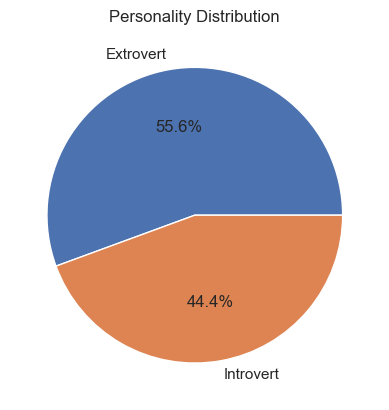

In [100]:
#to understand the %introverts and %extroverts in the dataset we are going to analyse 
counts = data['Personality'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Personality Distribution')
plt.show()

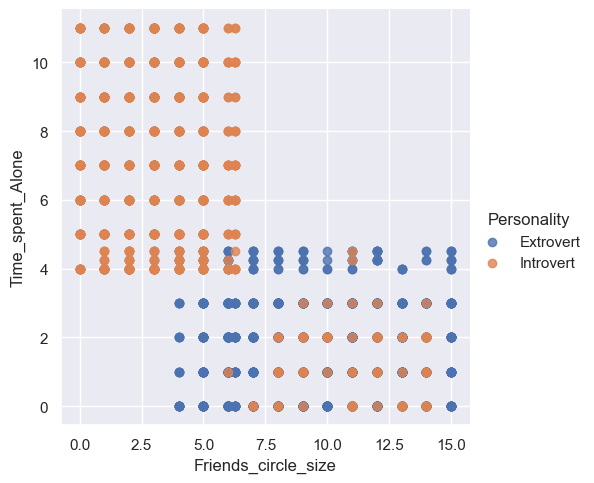

In [49]:
sns.set(style='darkgrid')
sns.lmplot(x='Friends_circle_size',y='Time_spent_Alone',data=data,fit_reg=False,hue='Personality',legend=True)

<Axes: xlabel='Stage_fear', ylabel='count'>

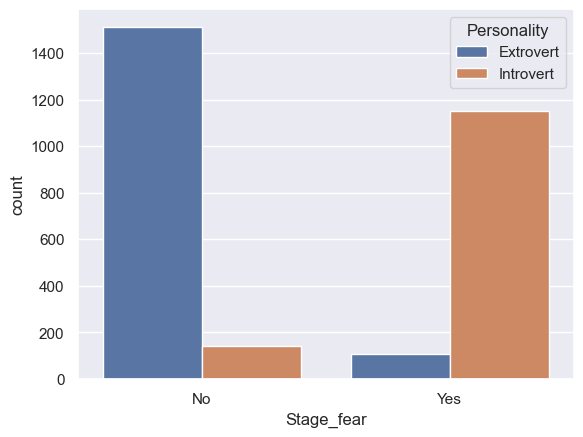

In [98]:
sns.countplot(x="Stage_fear",data=data, hue="Personality")

<Axes: xlabel='Drained_after_socializing', ylabel='count'>

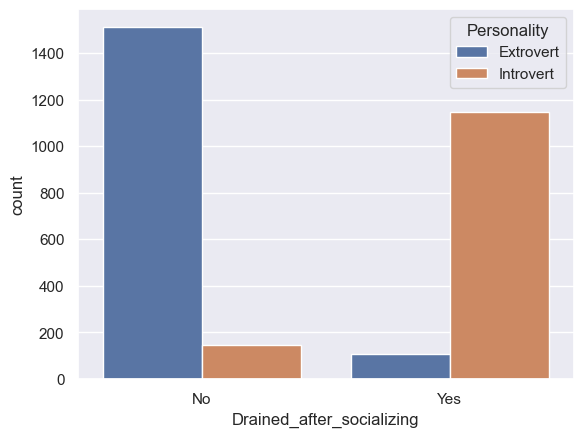

In [69]:
sns.countplot(x="Drained_after_socializing",data=data, hue="Personality")

<Axes: xlabel='Going_outside', ylabel='Count'>

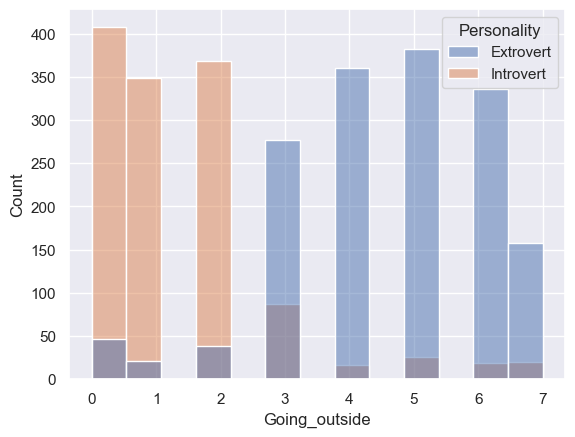

In [70]:

sns.histplot(data=data, x='Going_outside', hue='Personality')

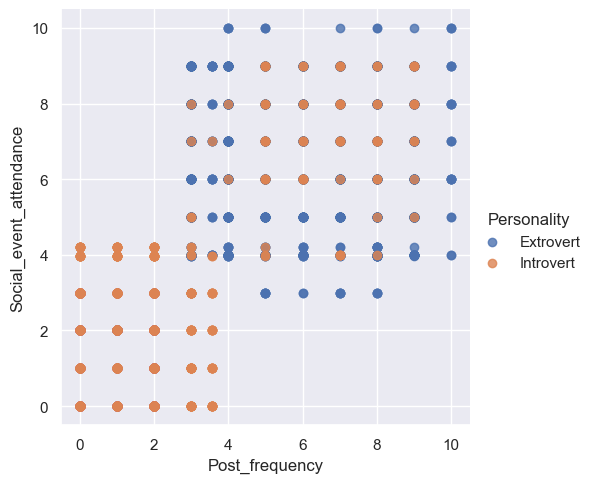

In [59]:
sns.set(style='darkgrid')
sns.lmplot(x='Post_frequency',y='Social_event_attendance',data=data,fit_reg=False,hue='Personality',legend=True)

<Axes: xlabel='Social_event_attendance', ylabel='Drained_after_socializing'>

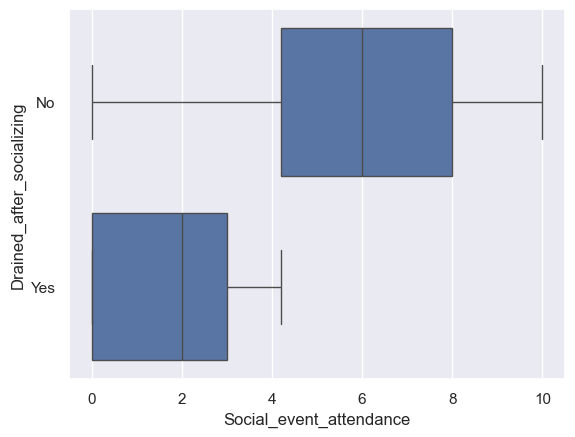

In [60]:
sns.boxplot(x=data['Social_event_attendance'],y=data['Drained_after_socializing'])

<Axes: xlabel='Social_event_attendance', ylabel='Personality'>

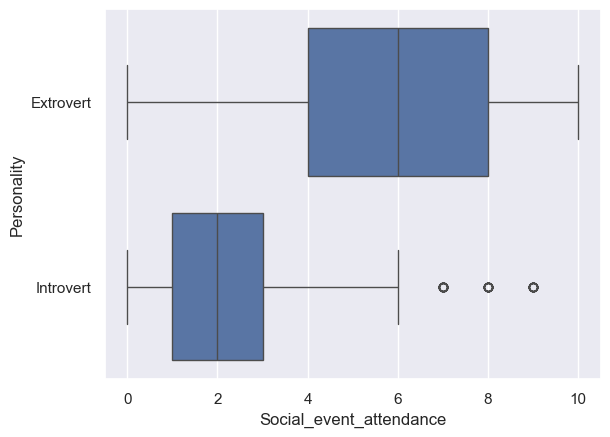

In [61]:
sns.boxplot(x=data['Social_event_attendance'],y=data['Personality'])

<Axes: xlabel='Drained_after_socializing', ylabel='count'>

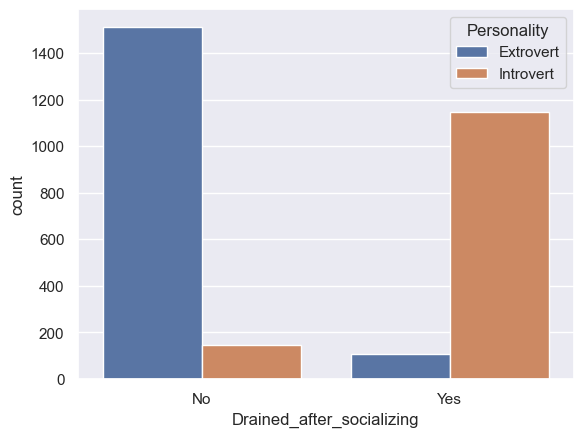

In [68]:
sns.countplot(x=data['Drained_after_socializing'],hue=data['Personality'])

<Axes: xlabel='Going_outside', ylabel='Density'>

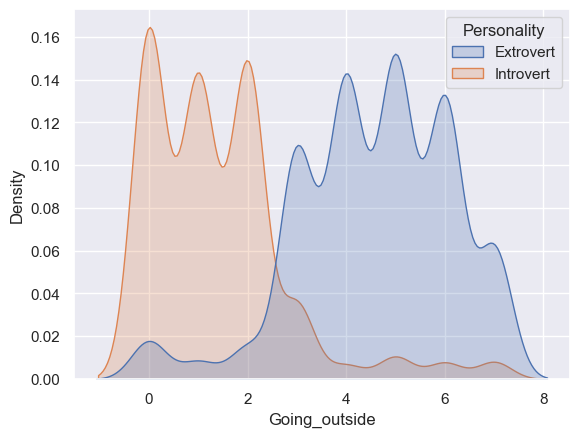

In [71]:
sns.kdeplot(x=data['Going_outside'],hue=data['Personality'],fill=True)

In [86]:
num_data=data.select_dtypes(exclude=[object])
corr_matrix=num_data.corr()


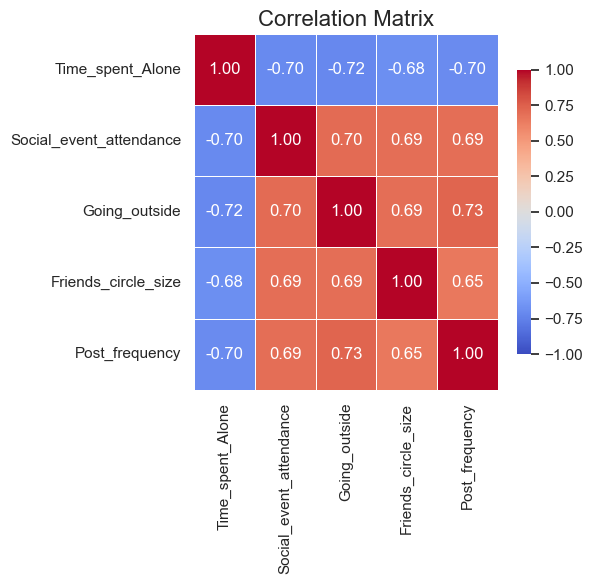

In [81]:
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, 
            annot=True,     # Show the correlation values
            cmap='coolwarm', # Color map (red for negative, blue for positive)
            vmin=-1,        # Minimum value for color scale
            vmax=1,         # Maximum value for color scale
            fmt='.2f',      # Format of the annotations (2 decimal places)
            linewidths=0.5, # Width of the lines between cells
            cbar_kws={"shrink": 0.8})  # Customize the colorbar
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()  # Adjust the layout
plt.show()

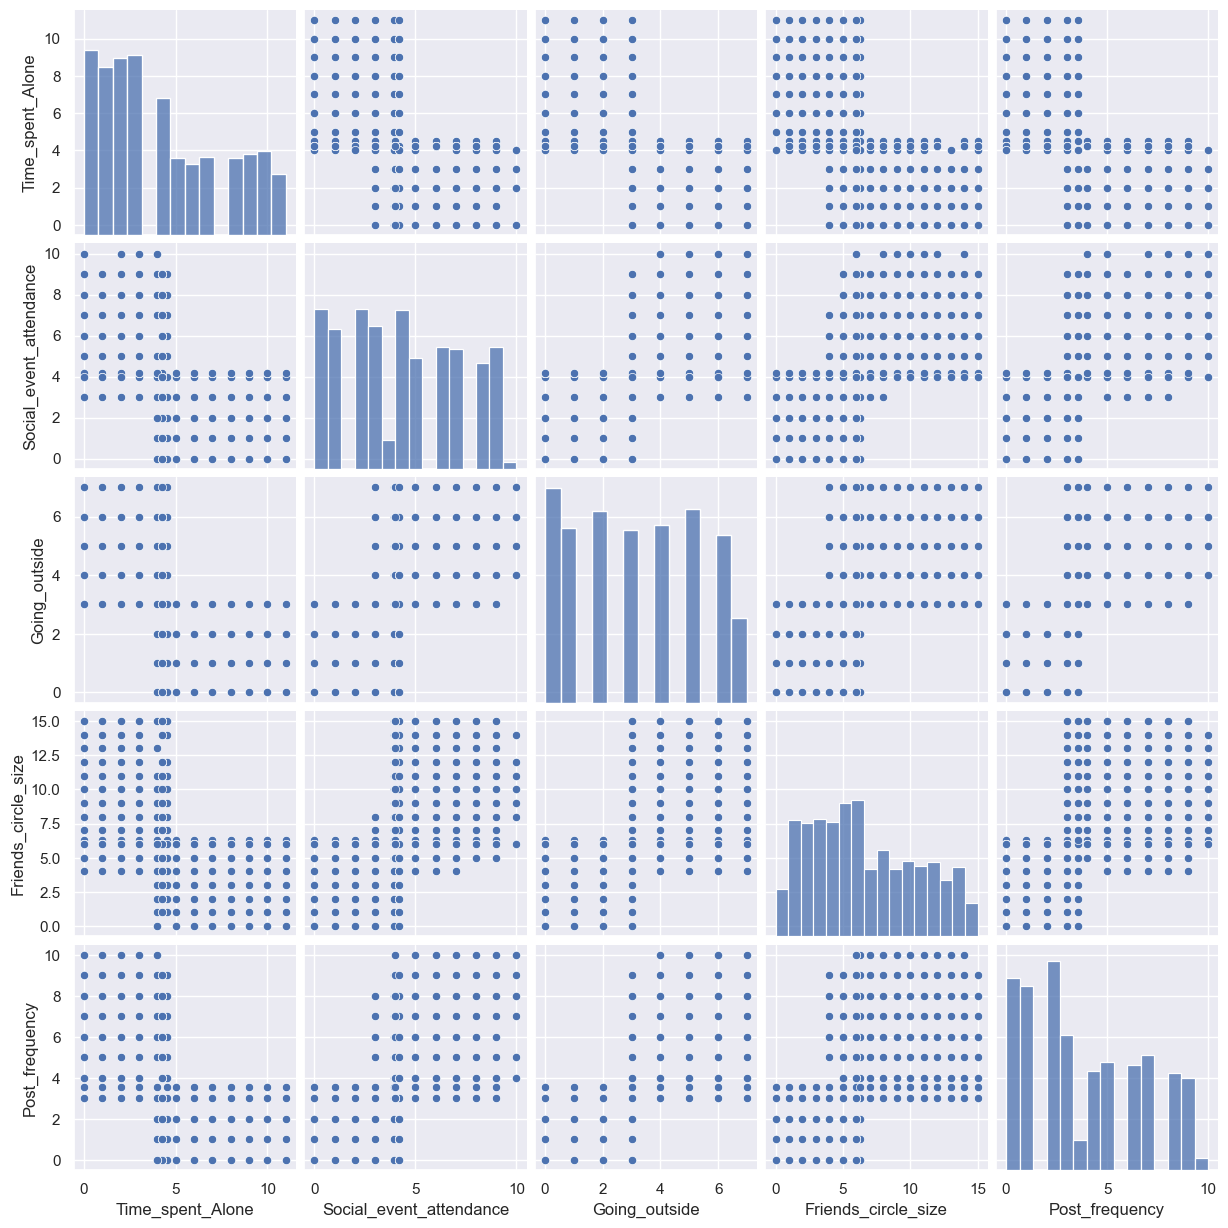

In [83]:
sns.pairplot(data)
plt.show()

<h2>💾 Summary of the Data</h2>

In [102]:
#Verifying the data we obtained from the data visualisation 
introverts = data[data['Personality'].str.lower().str.contains('introvert')]
extroverts = data[data['Personality'].str.lower().str.contains('extrovert')]

summary_stats = {
    'Introverts with Stage Fear (%)': (introverts['Stage_fear'] == 'Yes').mean()*100,
    'Extroverts with Stage Fear (%)': (extroverts['Stage_fear'] == 'Yes').mean()*100,
    'Introverts Drained After Socializing (%)': (introverts['Drained_after_socializing']=='Yes').mean()*100,
    'Extroverts Drained After Socializing (%)': (extroverts['Drained_after_socializing'] == 'Yes').mean() * 100,
    'Introverts Prefer Staying Indoors (Going_outside <= 2) (%)': (introverts['Going_outside'] <= 2).mean() * 100,
    'Extroverts Prefer Outdoors (Going_outside >= 4) (%)': (extroverts['Going_outside'] >= 4).mean() * 100,
    'Introverts with High Post Frequency (>=4) (%)': (introverts['Post_frequency'] >= 4).mean() * 100,
    'Extroverts with High Post Frequency (>=4) (%)': (extroverts['Post_frequency'] >= 4).mean() * 100,
    
}
print("\n===== PERSONALITY TRAITS SUMMARY STATISTICS =====\n")
for key, value in summary_stats.items():
    # Format each value to 2 decimal places
    print(f"{key}: {value:.2f}%")


===== PERSONALITY TRAITS SUMMARY STATISTICS =====

Introverts with Stage Fear (%): 88.94%
Extroverts with Stage Fear (%): 6.61%
Introverts Drained After Socializing (%): 88.63%
Extroverts Drained After Socializing (%): 6.61%
Introverts Prefer Staying Indoors (Going_outside <= 2) (%): 87.01%
Extroverts Prefer Outdoors (Going_outside >= 4) (%): 76.41%
Introverts with High Post Frequency (>=4) (%): 5.72%
Extroverts with High Post Frequency (>=4) (%): 77.39%


## 💾 Exporting the Cleaned Data

We export the final cleaned dataset for reuse in modeling or further analysis.

In [101]:
# Export the cleaned dataset to a CSV file
data.to_csv("cleaned_personality_data.csv", index=False)

print("✅ Cleaned dataset exported as 'cleaned_personality_data.csv'")


✅ Cleaned dataset exported as 'cleaned_personality_data.csv'


## 🧠 Final Conclusion: Data-Driven Personality Insights vs Psychological Theory

This exploratory data analysis not only revealed patterns within the dataset but also aligned strongly with established psychological theories of personality — particularly **Carl Jung's** and **Eysenck’s** theories on **introversion and extroversion**.

### 🧾 Key Behavioral Insights with Psychological Validation

1. **😰 Stage Fear and Introversion**  
   - Approximately **88.94% of introverts** reported having stage fear (vs **6.61% of extroverts**) as seen in the **count plot**.  
   - This supports the theory that **introverts experience social performance anxiety more frequently**, as they derive energy from solitude and tend to avoid large audience engagements.

2. **🔋 Social Fatigue After Interaction**  
   - Around **88.63% of introverts** reported feeling drained after socializing (vs **6.61% of extroverts**), shown in **count plots**.  
   - Consistent with psychology: introverts are known to **lose energy in group settings**, while **extroverts feel recharged** by social interactions.

3. **🚶 Going Outside and Exploration Tendencies**  
   - KDE and histogram plots revealed that **~87.01% of introverts** prefer staying indoors (Going_outside ≤ 2), while **76.41% of extroverts** frequently go out (≥ 4).  
   - This reflects Jungian concepts where introverts prefer **internal reflection**, while extroverts seek **external stimulation**.

4. **📤 Post Frequency and Event Attendance**  
   - **Scatter and pair plots** showed a positive relationship between `Post_frequency` and `Social_event_attendance`, especially for extroverts.  
   - This aligns with the **high sociability, assertiveness, and activity level** associated with extroverted behavior.

5. **📊 Correlation Matrix and Feature Interdependence**  
   - The heatmap showed a moderate correlation between traits like post frequency and event attendance — strengthening the idea that **social activity variables are interconnected and influenced by personality**.

---


### 🔍 Psychological Framework Supported

| Trait                         | Supported Insight from Data               | Related Psychological Concept              |
|------------------------------|-------------------------------------------|--------------------------------------------|
| Social withdrawal             | Introverts prefer solitude                | Carl Jung’s introversion                   |
| Energy drain after socializing| Introverts feel mentally exhausted        | Eysenck’s cortical arousal theory          |
| Outgoing/social behaviors     | Extroverts post more and attend events    | High dopamine sensitivity in extroverts    |
| Risk-averse vs sensation-seeking| Introverts stay in; extroverts explore  | Behavioral activation/inhibition systems   |


### 📌 Summary Statement

The dataset reflects real-world behavioral patterns of personality types, reinforcing foundational psychological theories. Traits such as **stage fear, social fatigue, and outdoor/social activity** clearly differentiate introverts from extroverts — not just statistically, but also behaviorally and psychologically.

Thus, this data-driven personality profiling offers not only meaningful insights but also validates the **scientific psychology of human behavior** through empirical evidence.
